In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\E\Downloads\train_ctrUa4K.csv',index_col="Loan_ID")

In [3]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 12)

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

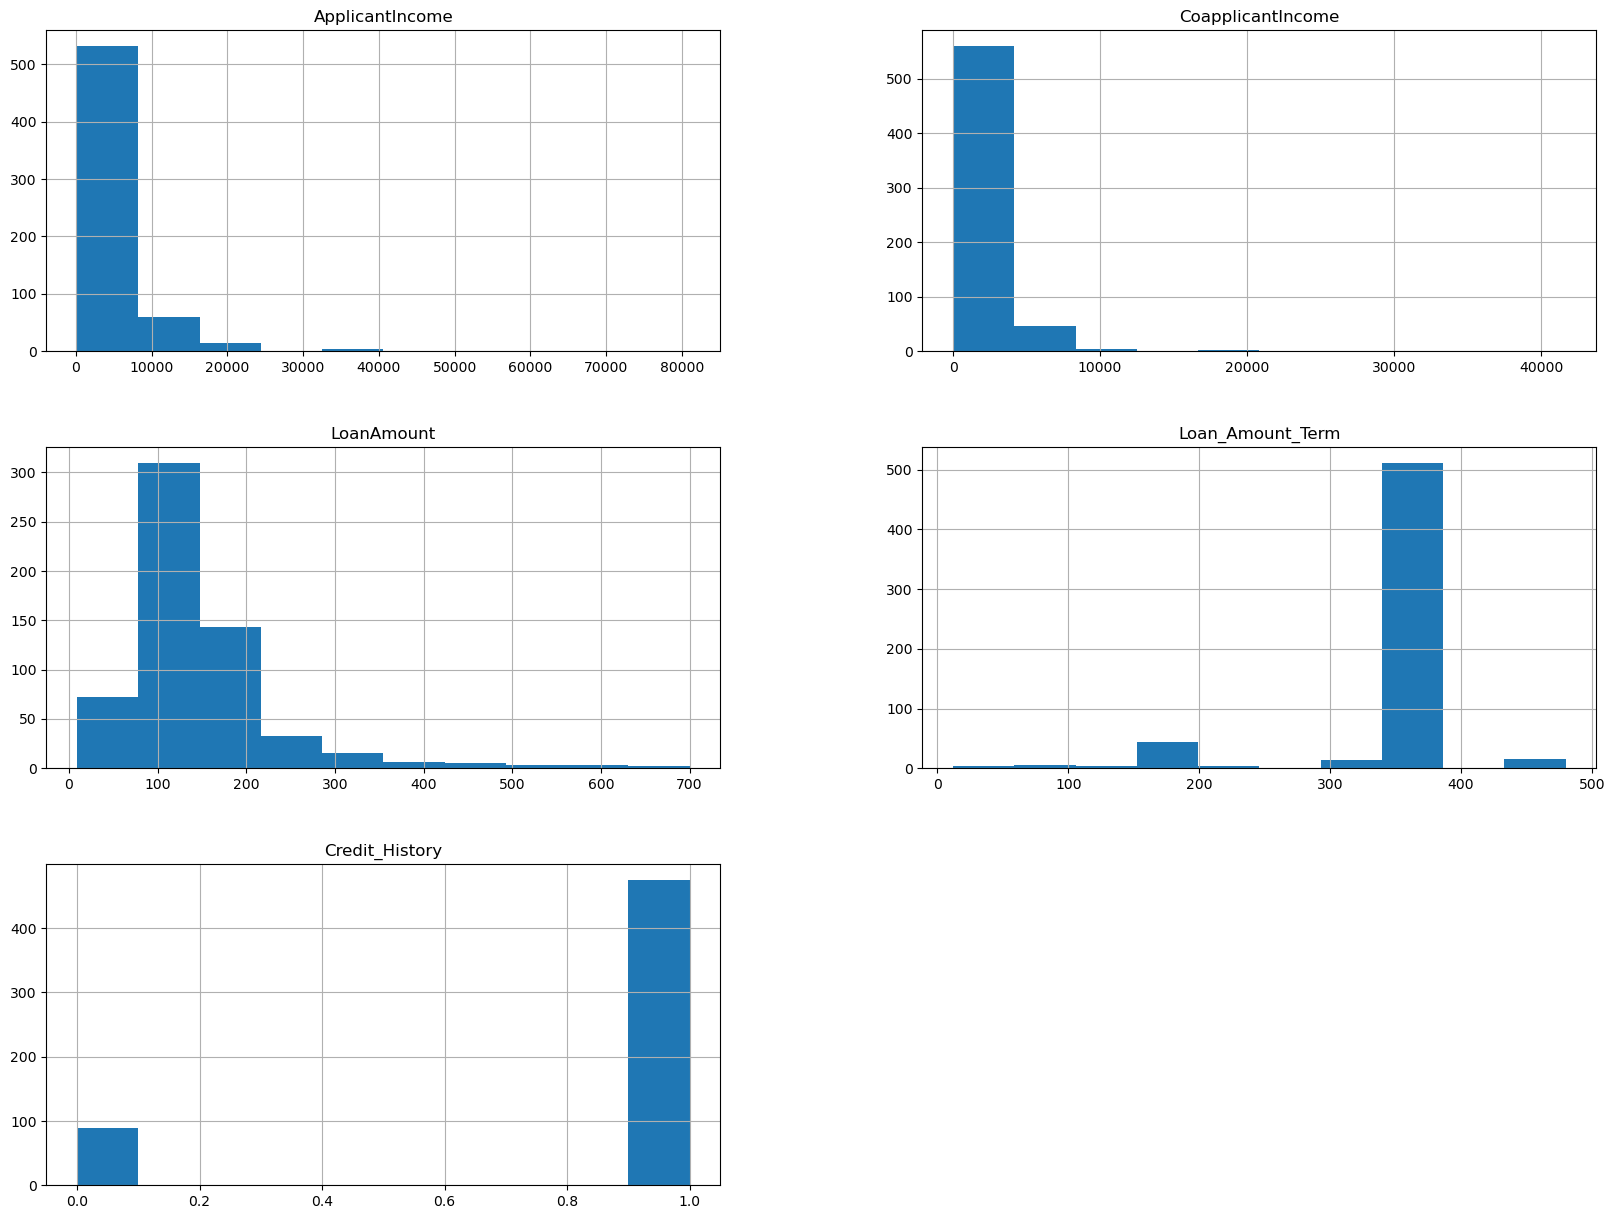

In [6]:
freq_graph = data.select_dtypes(include = ["float", "int"])
freq_graph.hist(figsize = (20, 15))

# Preprocessing

In [7]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
for i in['Gender', 'Married','Self_Employed']:
    data[i]=data[i].fillna(data[i].mode()[0])

In [10]:
for i in['LoanAmount','Loan_Amount_Term', 'Credit_History']:
    data[i]=data[i].fillna(data[i].median())

In [11]:
data.isna().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
data.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']:
    data[i] = le.fit_transform(data[i])

In [16]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1


# Correlation Matrix

<AxesSubplot:title={'center':'Correlation matrix for numerical features  \n'}>

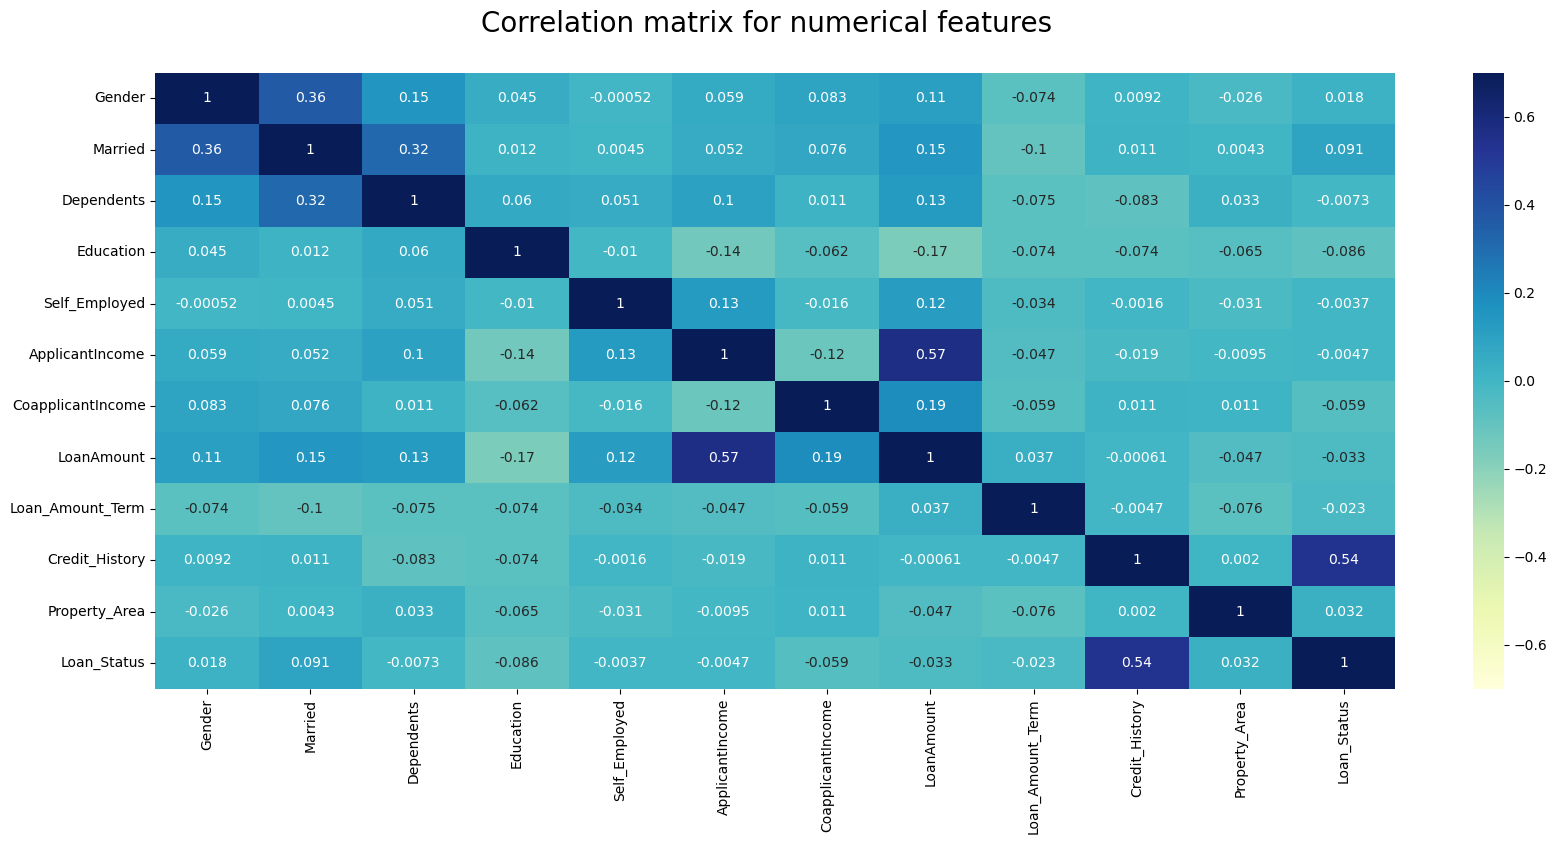

In [17]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
plt.title("Correlation matrix for numerical features  \n", size = 20)
sns.heatmap(corrmatrix,vmax=0.7,vmin=-0.7,annot=True,cmap='YlGnBu')

# minmax scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler(feature_range=(0,1)) 
X1=minmax.fit_transform(data)


In [19]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
X1=pd.DataFrame(X1,columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'])

In [21]:
X1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.00,0.0,0.0,0.070489,0.000000,0.172214,0.743590,1.0,1.0,1.0
1,1.0,1.0,0.25,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0,0.0
2,1.0,1.0,0.00,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0,1.0
3,1.0,1.0,0.00,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0,1.0
4,1.0,0.0,0.00,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.00,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0,1.0
610,1.0,1.0,0.75,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0,1.0
611,1.0,1.0,0.25,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0,1.0
612,1.0,1.0,0.50,0.0,0.0,0.091936,0.000000,0.257598,0.743590,1.0,1.0,1.0


In [22]:
X1.index=data.index

In [23]:
X1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1.0,0.0,0.00,0.0,0.0,0.070489,0.000000,0.172214,0.743590,1.0,1.0,1.0
LP001003,1.0,1.0,0.25,0.0,0.0,0.054830,0.036192,0.172214,0.743590,1.0,0.0,0.0
LP001005,1.0,1.0,0.00,0.0,1.0,0.035250,0.000000,0.082489,0.743590,1.0,1.0,1.0
LP001006,1.0,1.0,0.00,1.0,0.0,0.030093,0.056592,0.160637,0.743590,1.0,1.0,1.0
LP001008,1.0,0.0,0.00,0.0,0.0,0.072356,0.000000,0.191027,0.743590,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,0.0,0.0,0.00,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0,1.0
LP002979,1.0,1.0,0.75,0.0,0.0,0.048930,0.000000,0.044863,0.358974,1.0,0.0,1.0
LP002983,1.0,1.0,0.25,0.0,0.0,0.097984,0.005760,0.353111,0.743590,1.0,1.0,1.0


# Splitting target and independent features

In [24]:
from sklearn.model_selection import train_test_split
y = X1['Loan_Status']
x = X1.drop('Loan_Status',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [ ]:
#LinearRegression

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R Squared value is:',r2_score(y_test,y_pred))

MSE is: 0.1659883694044928
R Squared value is: 0.2716728278373377


In [ ]:
#LassoRegression

In [26]:
from sklearn.linear_model import Lasso

ls_reg       = Lasso()
model_lasso  = ls_reg.fit(x_train,y_train)
y_pred_lasso = model_lasso.predict((x_test))
print('MSE is ', mean_squared_error(y_test,y_pred_lasso))
print('R Squared value :',r2_score(y_test,y_pred_lasso))

MSE is  0.23096322397021699
R Squared value : -0.01342517184367642


In [ ]:
#LogisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score


log_reg    = LogisticRegression()
model_log  = log_reg.fit(x_train ,y_train)
y_pred_log = model_log.predict(x_test)


# Confusion matrix and accuracy score

print(confusion_matrix(y_test,y_pred_log))
print(accuracy_score(y_test, y_pred_log))

[[ 27  38]
 [  2 118]]
0.7837837837837838


In [28]:
y_pred_log


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

In [ ]:
#KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
metric_k= []
neighbors = np.arange(3,15)

for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    model2=knn.fit(x_train,y_train)
    y_pred_knn=model2.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

C:\Users\E\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\E\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

In [30]:
metric_k

[0.7513513513513513,
 0.6972972972972973,
 0.7243243243243244,
 0.6972972972972973,
 0.7405405405405405,
 0.7135135135135136,
 0.745945945945946,
 0.7405405405405405,
 0.7783783783783784,
 0.7837837837837838,
 0.7675675675675676,
 0.7783783783783784]

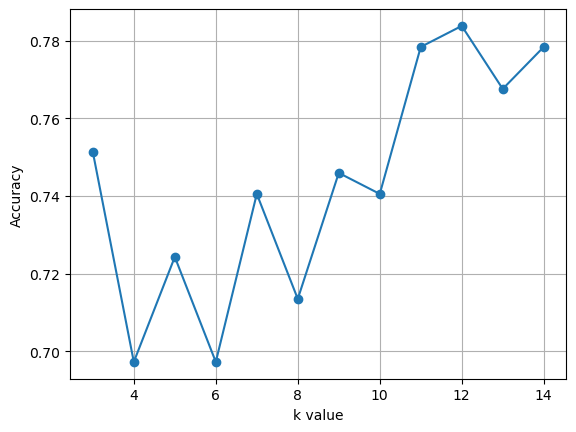

In [31]:
plt.plot(neighbors, metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [32]:
knn= KNeighborsClassifier(n_neighbors=12)
model2= knn.fit(x_train, y_train)
y_pred_knn= model2.predict(x_test)

C:\Users\E\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [33]:
print(confusion_matrix(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))


[[ 28  37]
 [  3 117]]
0.7837837837837838


In [34]:
from sklearn.svm import SVC

In [ ]:
#RBF

In [35]:
svm_rbf       = SVC(kernel = "rbf")
svm_model_rbf = svm_rbf.fit(x_train, y_train)
y_pred_rbf    = svm_model_rbf.predict(x_test)


print(confusion_matrix(y_test, y_pred_rbf))
print(accuracy_score(y_test, y_pred_rbf))

[[ 27  38]
 [  2 118]]
0.7837837837837838


In [ ]:
#LINEAR

In [36]:
svm_linear       = SVC(kernel = "linear")
svm_model_linear = svm_linear.fit(x_train, y_train)
y_pred_linear    = svm_model_linear.predict(x_test)


print(confusion_matrix(y_test, y_pred_linear))
print(accuracy_score(y_test, y_pred_linear))

[[ 27  38]
 [  2 118]]
0.7837837837837838


In [ ]:
#POLY

In [37]:
svm_poly       = SVC(kernel = "poly")
svm_model_poly = svm_poly.fit(x_train, y_train)
y_pred_poly    = svm_model_poly.predict(x_test)


print(confusion_matrix(y_test, y_pred_poly))
print(accuracy_score(y_test, y_pred_poly))

[[ 27  38]
 [  3 117]]
0.7783783783783784


In [ ]:
#DecisionTree

In [38]:
from sklearn.tree import DecisionTreeClassifier 

dt         = DecisionTreeClassifier(random_state = 42)
dt_model   = dt.fit(x_train, y_train)
y_pred_dt  = dt_model.predict(x_test)


print(confusion_matrix(y_test, y_pred_dt))
print(accuracy_score(y_test, y_pred_dt))

[[30 35]
 [31 89]]
0.6432432432432432


In [ ]:
#RandomForest

In [39]:
from sklearn.ensemble import RandomForestClassifier 

rf       = RandomForestClassifier(random_state = 42)
rf_model = rf.fit(x_train, y_train)
y_pred_rf  = rf_model.predict(x_test)


print(confusion_matrix(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

[[ 32  33]
 [  9 111]]
0.772972972972973


In [81]:
#ACCURACY IS HIGH FOR RADOM FOREST SO MODELLING WITH RANDOM FOREST

In [40]:
y_pred_rf

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.])

In [41]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP002139,1.0,1.0,0.0,0.0,0.0,0.110489,0.000000,0.316932,0.743590,1.0,0.5
LP002223,1.0,1.0,0.0,0.0,0.0,0.051453,0.000000,0.175109,0.743590,1.0,0.5
LP001570,1.0,1.0,0.5,0.0,0.0,0.049685,0.034728,0.215630,0.743590,1.0,0.0
LP002978,0.0,0.0,0.0,0.0,0.0,0.034014,0.000000,0.089725,0.743590,1.0,0.0
LP001478,1.0,0.0,0.0,0.0,0.0,0.031763,0.000000,0.088278,0.743590,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...
LP002226,1.0,1.0,0.0,0.0,0.0,0.039369,0.060000,0.172214,0.743590,1.0,0.5
LP002434,1.0,1.0,0.5,1.0,0.0,0.055683,0.000000,0.146165,0.743590,1.0,0.0
LP001508,1.0,1.0,0.5,0.0,0.0,0.143562,0.000000,0.257598,0.358974,1.0,1.0


In [42]:
y_pred_rf=pd.DataFrame(y_pred_rf,columns=['Loan_Status'])


In [43]:
y_pred_rf

,Loan_Status
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
180,1.0
181,1.0
182,1.0
183,1.0


In [44]:
y_pred_rf['Loan_Status']=y_pred_rf['Loan_Status'].replace([1.0],'Y')
y_pred_rf['Loan_Status']=y_pred_rf['Loan_Status'].replace([0.0],'N')

In [45]:
y_pred_rf

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
180,Y
181,Y
182,Y
183,Y


In [46]:
y_pred_rf.index=x_test.index

In [47]:
y_pred_rf

,Loan_Status
Loan_ID,
LP002139,Y
LP002223,Y
LP001570,Y
LP002978,Y
LP001478,Y
...,...
LP002226,Y
LP002434,Y
LP001508,Y


In [48]:
y_pred_rf.reset_index(inplace=True)

In [49]:
y_pred_rf

,Loan_ID,Loan_Status
0,LP002139,Y
1,LP002223,Y
2,LP001570,Y
3,LP002978,Y
4,LP001478,Y
...,...,...
180,LP002226,Y
181,LP002434,Y
182,LP001508,Y
183,LP001936,Y


# DOING ALL THE NEEDED STEPS IN TEST DATA

In [50]:
data1=pd.read_csv(r'C:\Users\E\Downloads\test_lAUu6dG.csv',index_col="Loan_ID")

In [51]:
data1


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban


In [52]:
data1.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [53]:
data1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [54]:
for i in['Gender', 'Married','Self_Employed']:
    data1[i]=data1[i].fillna(data1[i].mode()[0])

In [55]:
for i in['LoanAmount','Loan_Amount_Term', 'Credit_History']:
    data1[i]=data1[i].fillna(data1[i].median())

In [56]:
data1.isna().sum()

Gender                0
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [57]:
data1.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le=LabelEncoder()

In [60]:
for i in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area',]:
    data1[i] = le.fit_transform(data1[i])

In [61]:
data1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
LP002971,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
LP002980,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1


<AxesSubplot:>

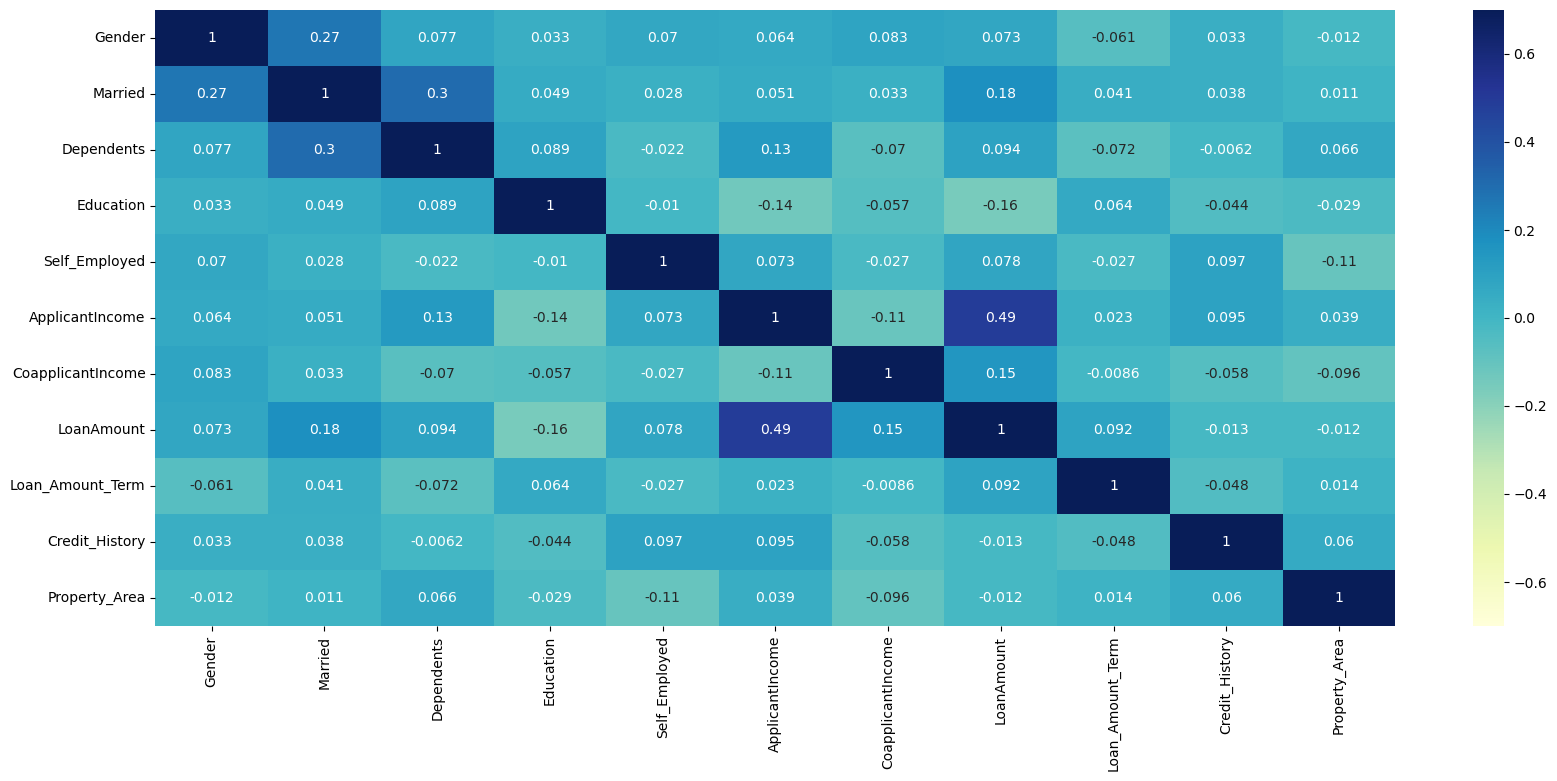

In [62]:
corrmatrix=data1.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmax=0.7,vmin=-0.7,annot=True,cmap='YlGnBu')

In [63]:
#minmax scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler(feature_range=(0,1)) 
X2=minmax.fit_transform(data1)


In [65]:
data1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [66]:
X2=pd.DataFrame(X2,columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

In [67]:
X2.index=data1.index

In [68]:
X2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1.0,1.0,0.00,0.0,0.0,0.078865,0.000000,0.157088,0.746835,1.0,1.0
LP001022,1.0,1.0,0.25,0.0,0.0,0.042411,0.062500,0.187739,0.746835,1.0,1.0
LP001031,1.0,1.0,0.50,0.0,0.0,0.068938,0.075000,0.344828,0.746835,1.0,1.0
LP001035,1.0,1.0,0.50,0.0,0.0,0.032263,0.106083,0.137931,0.746835,1.0,1.0
LP001051,1.0,0.0,0.00,1.0,0.0,0.045168,0.000000,0.095785,0.746835,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
LP002971,1.0,1.0,0.75,1.0,1.0,0.055274,0.074042,0.162835,0.746835,1.0,1.0
LP002975,1.0,1.0,0.00,0.0,0.0,0.057329,0.029542,0.166667,0.746835,1.0,1.0
LP002980,1.0,0.0,0.00,0.0,0.0,0.044810,0.083042,0.187739,0.746835,1.0,0.5


# PREDICTING THE MODEL

In [82]:
 #MODELLING WITH RANDOM FOREST

In [69]:
y_pred_rf_test  = rf_model.predict(X2)

In [70]:
y_pred_rf_test 

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

In [71]:
y_pred_rf_test=pd.DataFrame(y_pred_rf_test,columns=['Loan_Status'])

In [72]:
y_pred_rf_test

,Loan_Status
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
362,1.0
363,1.0
364,1.0
365,1.0


In [73]:
y_pred_rf_test['Loan_Status']=y_pred_rf_test['Loan_Status'].replace([1.0],'Y')
y_pred_rf_test['Loan_Status']=y_pred_rf_test['Loan_Status'].replace([0.0],'N')

In [74]:
y_pred_rf_test

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,Y
...,...
362,Y
363,Y
364,Y
365,Y


In [75]:
y_pred_rf_test.index=X2.index

In [76]:
y_pred_rf_test

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
...,...
LP002971,Y
LP002975,Y
LP002980,Y


In [77]:
y_pred_rf_test.reset_index(inplace=True)

In [78]:
y_pred_rf_test

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [79]:
y_pred_rf_test.to_csv('SAMPLE.csv',index=False)